In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
train_data = pd.read_csv("cosmicclassifierTraining.csv")
test_data = pd.read_csv("cosmicclassifierTest.csv")
df = train_data

In [ ]:
train_data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0


In [ ]:
test_data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index
0,-1.303074,2.932540,-0.168043,-1.220249,-1.942662,0.950473,1.540782,Category_13,Category_6,-0.729809
1,0.081124,-3.747390,-0.598897,1.563487,-0.199953,-1.844926,1.095349,Category_11,Category_10,-0.341850
2,-3.709952,-1.689588,0.259499,1.020046,-2.094565,0.344641,-0.094227,Category_9,Category_9,-0.532658
3,4.838804,0.442909,0.995312,-0.385272,-0.818065,-1.903998,2.727794,Category_10,Category_9,-0.205558
4,0.742217,2.802281,-1.144759,2.475840,-0.585959,0.880694,-1.942863,Category_11,Category_6,0.763087


In [ ]:
train_data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Atmospheric Density            57016 non-null  float64
 1   Surface Temperature            56968 non-null  float64
 2   Gravity                        57016 non-null  float64
 3   Water Content                  56923 non-null  float64
 4   Mineral Abundance              57079 non-null  float64
 5   Orbital Period                 57003 non-null  float64
 6   Proximity to Star              57055 non-null  float64
 7   Magnetic Field Strength        56942 non-null  object 
 8   Radiation Levels               56979 non-null  object 
 9   Atmospheric Composition Index  57058 non-null  float64
 10  Prediction                     56961 non-null  float64
dtypes: float64(9), object(2)
memory usage: 5.0+ MB


In [ ]:
train_data.describe()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Atmospheric Composition Index,Prediction
count,57016.000000,56968.000000,57016.000000,56923.000000,57079.000000,57003.000000,57055.000000,57058.000000,56961.000000
mean,-0.000202,-0.000288,-0.000469,0.001938,-0.000730,-0.001043,0.000188,0.000211,4.454381
std,2.263527,1.936598,1.804605,1.689267,1.605524,1.511685,1.316682,1.120303,2.890055
min,-4.364843,-5.503527,-5.553877,-5.816755,-5.077363,-4.801046,-4.537187,-4.007504,0.000000
25%,-1.555810,-1.426786,-1.279002,-1.218870,-1.078449,-1.048920,-0.937097,-0.709852,2.000000
50%,-0.188670,-0.330037,0.046231,-0.004676,0.040008,0.036651,-0.062001,0.049292,4.000000
75%,1.308113,1.503646,1.255432,1.063391,1.095483,1.058800,0.888149,0.789511,7.000000
max,9.324018,5.638094,6.030290,6.287045,5.584059,5.111014,4.942699,3.852567,9.000000


In [ ]:
train_data.replace({-999: np.nan}, inplace=True)
test_data.replace({-999: np.nan}, inplace=True)


In [ ]:
train_data.isnull().sum()


,0
Atmospheric Density,2984
Surface Temperature,3032
Gravity,2984
Water Content,3077
Mineral Abundance,2921
Orbital Period,2997
Proximity to Star,2945
Magnetic Field Strength,3058
Radiation Levels,3021
Atmospheric Composition Index,2942


In [ ]:
# lst = []
# for i in df['Magnetic Field Strength']:
#   if pd.notna(i):  # Check if i is not NaN using pandas function
#     try:
#       lst.append(int(str(i)[-1]))  # Convert i to string before subscripting
#     except (TypeError, IndexError):  # Handle potential errors during conversion
#       lst.append(np.nan)  # Append NaN if conversion fails
#   else:
#     lst.append(np.NaN)
# df['New Magnetic Field Strength'] = lst

In [ ]:
train_data['Magnetic Field Strength'] = train_data['Magnetic Field Strength'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
train_data['Radiation Levels'] = train_data['Radiation Levels'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)

In [ ]:
test_data['Magnetic Field Strength'] = test_data['Magnetic Field Strength'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
test_data['Radiation Levels'] = test_data['Radiation Levels'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)

In [ ]:
train_data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9,9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6,10,0.407941,9.0


In [ ]:
from sklearn.impute import SimpleImputer

# Replace large negative values with NaN
train_data.replace({-999: np.nan}, inplace=True)
test_data.replace({-999: np.nan}, inplace=True)

# Check missing values in training data
print("Missing values in training data:")
print(train_data.isnull().sum())

# Impute missing values using the median (or mean, depending on your exploration)
imputer = SimpleImputer(strategy='median')
# Assuming the first column is Planet_ID and the last column is the target label:
features_train = train_data.drop(columns=['Prediction'])
features_train_imputed = pd.DataFrame(imputer.fit_transform(features_train), columns=features_train.columns)

# Replace the features in train_data with the imputed values
train_data.update(features_train_imputed)

# For test data, drop Planet_ID and impute similarly
features_test = test_data
features_test_imputed = pd.DataFrame(imputer.transform(features_test), columns=features_test.columns)
test_data.update(features_test_imputed)


Missing values in training data:
Atmospheric Density              2984
Surface Temperature              3032
Gravity                          2984
Water Content                    3077
Mineral Abundance                2921
Orbital Period                   2997
Proximity to Star                2945
Magnetic Field Strength          3058
Radiation Levels                 3021
Atmospheric Composition Index    2942
Prediction                       3039
dtype: int64


In [ ]:
train_data.head()

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,-0.330037,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,9.0,6.0,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,9.0,9.0,0.049292,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,9.0,8.0,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,9.0,11.0,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,6.0,10.0,0.407941,9.0


In [ ]:
# import numpy as np
# from sklearn.impute import SimpleImputer

# # Replace large negative values (e.g., -999) with NaN
# train_data.replace({-999: np.nan}, inplace=True)
# test_data.replace({-999: np.nan}, inplace=True)

# # Drop rows where the target (Prediction) is missing
# train_data.dropna(subset=['Prediction'], inplace=True)
# train_data.head()

In [ ]:
# train_data.dropna(subset=['Prediction'], inplace=True)


In [ ]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='median')
# X_train_imputed = pd.DataFrame(imputer.fit_transform(train_data.drop(columns=[ 'Prediction'])),
#                                columns=train_data.drop(columns=[ 'Prediction']).columns)


In [ ]:
# train_data.describe().T[['mean', 'std']]


In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_imputed)


In [ ]:
# X = X_train_imputed  # Use the imputed values
# y = train_data['Prediction'].astype(int)  # Ensure target is integer


In [ ]:
# X_test_imputed = pd.DataFrame(imputer.transform(test_data.drop(columns=['Prediction'] if 'Prediction' in test_data else [])),
#                               columns=test_data.drop(columns=['Prediction'] if 'Prediction' in test_data else []).columns)


# # Now you can safely apply the scaling
# X_test_scaled = scaler.transform(X_test_imputed)


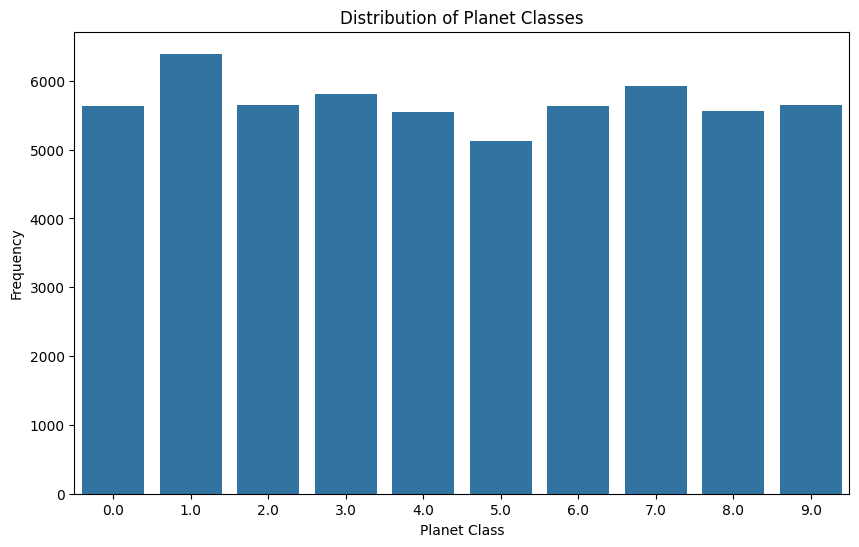

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=train_data['Prediction'])
plt.title("Distribution of Planet Classes")
plt.xlabel("Planet Class")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Separate features and target
X = train_data.drop(columns=['Prediction'])
y = train_data['Prediction']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Separate features and target
X = train_data.drop(columns=['Prediction'])
y = train_data['Prediction']

# Drop rows with NaN values in the target variable 'y'
train_data = train_data.dropna(subset=['Prediction'])

# Reset index after dropping rows to avoid potential issues
train_data.reset_index(drop=True, inplace=True)

# Re-separate features and target after dropping NaNs
X = train_data.drop(columns=['Prediction'])
y = train_data['Prediction']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42, stratify=y
)

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier(n_neighbors=10)),
    ("Decision Tree", DecisionTreeClassifier())
]


RandomForestClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred))


Validation Accuracy: 0.8768870684610883
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       846
         1.0       0.96      0.97      0.96       959
         2.0       0.89      0.93      0.91       847
         3.0       0.85      0.83      0.84       872
         4.0       0.84      0.82      0.83       833
         5.0       0.83      0.84      0.84       770
         6.0       0.92      0.92      0.92       846
         7.0       0.91      0.90      0.91       889
         8.0       0.82      0.83      0.83       835
         9.0       0.78      0.79      0.79       848

    accuracy                           0.88      8545
   macro avg       0.88      0.88      0.88      8545
weighted avg       0.88      0.88      0.88      8545



In [ ]:
    for name, model in models:
        count += 1
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='macro')
        cm = confusion_matrix(y_val, y_pred)
        results.append((name, accuracy, precision, cm))
        print(f"Model {count} trained and evaluated with {sampler_name}")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore")

# Load data
train_data = pd.read_csv("cosmicclassifierTraining.csv")
test_data = pd.read_csv("cosmicclassifierTest.csv")

print(train_data.head())

def preprocess_data(data):
    data.replace({-999: np.nan}, inplace=True)

    # Only drop rows with NaN values in 'Prediction' if 'Prediction' is a column
    if 'Prediction' in data.columns:
        data.dropna(subset=['Prediction'], inplace=True)

    # Handle category 9
    data['Magnetic Field Strength'] = data['Magnetic Field Strength'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
    data['Radiation Levels'] = data['Radiation Levels'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
    data['Magnetic Field Strength'] = data['Magnetic Field Strength'].astype(float)
    data['Radiation Levels'] = data['Radiation Levels'].astype(float)

    imputer = SimpleImputer(strategy='median')

    # If 'Prediction' is a column, exclude it from imputation
    features = data.drop(columns=['Prediction'] if 'Prediction' in data else [])

    features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)
    data.update(features_imputed)
    return data

# Preprocess training and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Separate features and target
X = train_data.drop(columns=['Prediction'])
y = train_data['Prediction']

# Before scaling, ensure there are no NaNs in X
X.fillna(X.mean(), inplace=True)  # Or use another imputation strategy if you prefer

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for balancing classes
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define multiple models
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier(n_neighbors=10)),
    ("Decision Tree", DecisionTreeClassifier())
]

# Train and evaluate models
results = []
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='macro')
    cm = confusion_matrix(y_val, y_pred)
    results.append((name, accuracy, precision, cm))

# Sort results by precision
results.sort(key=lambda x: x[2], reverse=True)

# Display results
for result in results:
    print(f"Model: {result[0]}")
    print(f"Accuracy: {result[1]}")
    print(f"Precision: {result[2]}")
    print(f"Confusion Matrix:\n{result[3]}\n")

# Hyperparameter tuning for the best model
best_model_name, best_model = models[0]
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

   Atmospheric Density  Surface Temperature   Gravity  Water Content  \
0             0.472806                  NaN -0.313872      -2.089299   
1             4.180154            -1.157515  2.430956      -1.595850   
2            -0.129008             1.621592 -0.785741       2.081196   
3            -3.122000            -2.299818  1.072092       0.353524   
4            -1.459426             2.890268  0.148757      -0.804439   

   Mineral Abundance  Orbital Period  Proximity to Star  \
0          -0.152201       -0.885649           0.900105   
1          -3.188678       -0.609434          -0.199828   
2          -1.413796       -0.095152          -3.502577   
3          -0.192529        2.917067          -1.972329   
4           0.494875        0.044910          -0.438796   

  Magnetic Field Strength Radiation Levels  Atmospheric Composition Index  \
0                     NaN       Category_6                       0.692907   
1              Category_9       Category_9                

In [ ]:
!pip install imbalanced-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
import warnings

warnings.filterwarnings("ignore")

# Load data
train_data = pd.read_csv("cosmicclassifierTraining.csv")
test_data = pd.read_csv("cosmicclassifierTest.csv")
print("flag1")

print(train_data.head())

def preprocess_data(data):
    data.replace({-999: np.nan}, inplace=True)

    if 'Prediction' in data.columns:
        data.dropna(subset=['Prediction'], inplace=True)

    # Handle category labels
    data['Magnetic Field Strength'] = data['Magnetic Field Strength'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
    data['Radiation Levels'] = data['Radiation Levels'].apply(lambda x: x.replace('Category_', '') if isinstance(x, str) else x)
    data['Magnetic Field Strength'] = data['Magnetic Field Strength'].astype(float)
    data['Radiation Levels'] = data['Radiation Levels'].astype(float)

    imputer = SimpleImputer(strategy='median')
    features = data.drop(columns=['Prediction'] if 'Prediction' in data else [])
    features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)
    data.update(features_imputed)
    return data

# Preprocess training and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Separate features and target
X = train_data.drop(columns=['Prediction'])
y = train_data['Prediction']

X.fillna(X.mean(), inplace=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

samplers = {
    "No Sampler": None,
    "SMOTE": SMOTE(),
    "RandomOverSampler": RandomOverSampler(),
    # "ADASYN": ADASYN(), # ADASYN removed
    "BorderlineSMOTE": BorderlineSMOTE()
}

models = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("SVM", SVC()),
    ("KNN", KNeighborsClassifier(n_neighbors=10)),
    ("Decision Tree", DecisionTreeClassifier())
]

best_results = []

for sampler_name, sampler in samplers.items():
    print(f"Testing with sampler: {sampler_name}")

    if sampler:
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)
    else:
        X_train_resampled, y_train_resampled = X_train, y_train

    results = []
    count = 0
    for name, model in models:
        count += 1
        model.fit(X_train_resampled, y_train_resampled)
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred, average='macro')
        cm = confusion_matrix(y_val, y_pred)
        results.append((name, accuracy, precision, cm))
        print(f"Model {count} trained and evaluated with {sampler_name}")

    results.sort(key=lambda x: x[2], reverse=True)
    best_results.append((sampler_name, results[0]))

# Display best results for each sampler
for sampler_name, result in best_results:
    print(f"Best model with {sampler_name}: {result[0]}")
    print(f"Accuracy: {result[1]}")
    print(f"Precision: {result[2]}")
    print(f"Confusion Matrix:\n{result[3]}\n")

# Hyperparameter tuning for the best model
best_model_name, best_model = models[0]
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best parameters for {best_model_name}: {grid_search.best_params_}")
print(f"Best accuracy: {grid_search.best_score_}")

flag1
   Atmospheric Density  Surface Temperature   Gravity  Water Content  \
0             0.472806                  NaN -0.313872      -2.089299   
1             4.180154            -1.157515  2.430956      -1.595850   
2            -0.129008             1.621592 -0.785741       2.081196   
3            -3.122000            -2.299818  1.072092       0.353524   
4            -1.459426             2.890268  0.148757      -0.804439   

   Mineral Abundance  Orbital Period  Proximity to Star  \
0          -0.152201       -0.885649           0.900105   
1          -3.188678       -0.609434          -0.199828   
2          -1.413796       -0.095152          -3.502577   
3          -0.192529        2.917067          -1.972329   
4           0.494875        0.044910          -0.438796   

  Magnetic Field Strength Radiation Levels  Atmospheric Composition Index  \
0                     NaN       Category_6                       0.692907   
1              Category_9       Category_9          